In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

x = df['RM']
y = df['target']

c:\Users\AY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [254]:
def least_squares_fit(x, y):
    w = np.corrcoef(x, y) * np.std(y) / np.std(x)
    b = np.mean(y) - w * np.mean(x)
    return w, b

In [255]:
def predict(x, w, b)-> float:
    return x * w + b

In [256]:
def MSE(x, w, b, y)-> float:
    error = (y - predict(x, w, b))**2 / len(y)
    return error

In [257]:
def cost_function(x, w, b, y)-> float:
    error = MSE(x, w, b, y)
    return 1 / 2 * error

In [310]:
# gradient desent
num_epoch = 10000
errors = []

# 학습률
learning_rate = 0.01

# 초기 w,b 랜덤 설정
w = np.random.uniform(low=9.0, high=10.0)
b = np.random.uniform(low=-40.0, high=-10.0)

for epoch in range(num_epoch):
    y_predict = predict(x, w, b)
    error = np.mean(((y_predict - y)**2))
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_predict - y) * x).mean()
    b = b - learning_rate * (y_predict - y).mean() 

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 5.85237, b = -18.04749 error = 355.12522
 5 w = 6.47865, b = -17.97992 error = 47.03544
10 w = 6.48298, b = -18.01006 error = 47.02295
15 w = 6.48770, b = -18.04008 error = 47.01062
20 w = 6.49242, b = -18.07006 error = 46.99834
25 w = 6.49712, b = -18.09998 error = 46.98611
30 w = 6.50181, b = -18.12984 error = 46.97391
35 w = 6.50650, b = -18.15965 error = 46.96176
40 w = 6.51118, b = -18.18941 error = 46.94966
45 w = 6.51585, b = -18.21911 error = 46.93760
50 w = 6.52051, b = -18.24876 error = 46.92558
55 w = 6.52516, b = -18.27836 error = 46.91361
60 w = 6.52981, b = -18.30790 error = 46.90168
65 w = 6.53444, b = -18.33739 error = 46.88979
70 w = 6.53907, b = -18.36682 error = 46.87794
75 w = 6.54369, b = -18.39621 error = 46.86614
80 w = 6.54830, b = -18.42554 error = 46.85438
85 w = 6.55290, b = -18.45482 error = 46.84266
90 w = 6.55750, b = -18.48404 error = 46.83099
95 w = 6.56208, b = -18.51321 error = 46.81935
100 w = 6.56666, b = -18.54233 error = 46.80776
105 w = 6.5

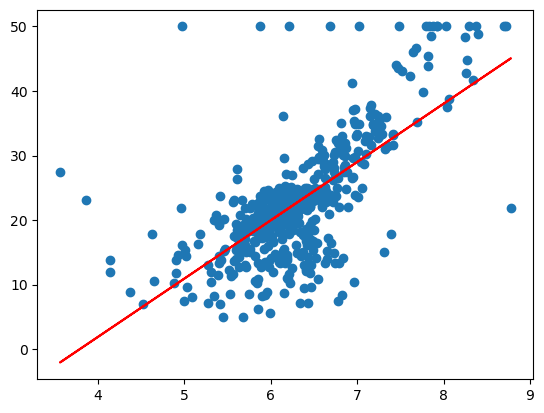

In [313]:
plt.scatter(x, y)
plt.plot(x, predict(x, w, b), color='red')